In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
train_dir = '/content/drive/MyDrive/Capstone_Dataset/DATA/train'
test_dir = '/content/drive/MyDrive/Capstone_Dataset/DATA/testing'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalization
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and iterate training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
)

# Load and iterate validation dataset
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
)
steps_per_epoch_train = np.ceil(train_generator.samples / 16).astype(int)
print(steps_per_epoch_train)
steps_per_epoch_val = np.ceil(validation_generator.samples  / 16).astype(int)
print(steps_per_epoch_val)

Found 440 images belonging to 5 classes.
Found 185 images belonging to 5 classes.
28
12


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch_train,
    epochs = 10,
    validation_data= validation_generator,
    validation_steps = steps_per_epoch_val
)

Epoch 1/10
28/28 [==============================] - 191s 7s/step - loss: 0.5444 - accuracy: 0.2682 - val_loss: 0.5332 - val_accuracy: 0.2811
Epoch 2/10
28/28 [==============================] - 28s 981ms/step - loss: 0.4577 - accuracy: 0.3909 - val_loss: 0.4348 - val_accuracy: 0.4486
Epoch 3/10
28/28 [==============================] - 27s 971ms/step - loss: 0.4118 - accuracy: 0.4955 - val_loss: 0.4420 - val_accuracy: 0.4378
Epoch 4/10
28/28 [==============================] - 27s 950ms/step - loss: 0.3924 - accuracy: 0.5091 - val_loss: 0.4258 - val_accuracy: 0.4865
Epoch 5/10
28/28 [==============================] - 26s 900ms/step - loss: 0.3603 - accuracy: 0.5864 - val_loss: 0.3692 - val_accuracy: 0.6000
Epoch 6/10
28/28 [==============================] - 28s 974ms/step - loss: 0.3549 - accuracy: 0.5705 - val_loss: 0.3811 - val_accuracy: 0.6000
Epoch 7/10
28/28 [==============================] - 27s 974ms/step - loss: 0.3190 - accuracy: 0.6477 - val_loss: 0.4228 - val_accuracy: 0.5730
E

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

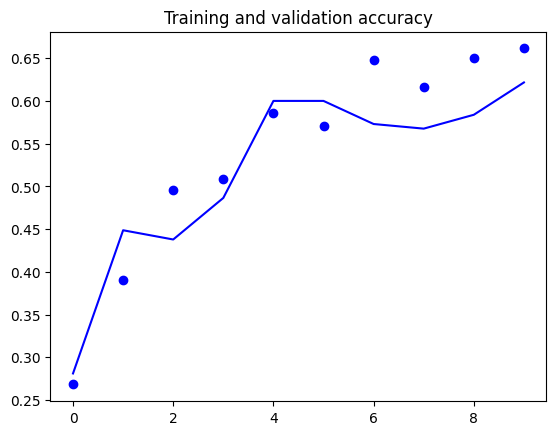

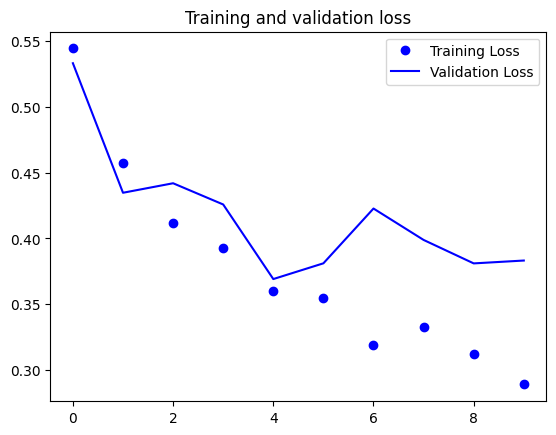

In [ ]:
plot_loss_acc(history)